In [2]:
from data_loader.data_loaders import get_loader, MnistDataLoader
import os
import matplotlib.pyplot as plt
from model.model import *
import torch 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from torchsummary import summary as summary
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/home/hklee/anaconda3/envs/humanAI/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libc10_cuda.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [3]:
from model.metric import *

In [4]:
train_data_loader = get_loader(os.getcwd()+'/data/plant', batch_size=16, mode='train') # binary dataset
valid_data_loader = get_loader(os.getcwd()+'/data/plant', batch_size=16, mode='valid')

/home/hklee/workspace/torch_segmentation/data/plant/images/train /home/hklee/workspace/torch_segmentation/data/plant/masks/train
/home/hklee/workspace/torch_segmentation/data/plant/images/valid /home/hklee/workspace/torch_segmentation/data/plant/masks/valid


In [5]:
for img ,mask in train_data_loader:
    print(img.shape)
    print(img.dtype)
    print(mask.shape)
    print(mask.dtype)
    break

torch.Size([16, 3, 240, 240])
torch.float32
torch.Size([16, 240, 240])
torch.float32


In [7]:
model = AttU_Net().to(device)

In [ ]:
model = AttU_Net().to(device)
summary(model, (3, 240, 240))		  

In [9]:
# init
EPOCHS = 10
epoch_loss_values = list()
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = optim.Adam(list(model.parameters()), 1e-5)
val_interval = 5

In [10]:
for epoch in range(EPOCHS):
    epoch_loss = 0.0
    
    model.train() # switch to train mode
    for step, batch in enumerate(tqdm(train_data_loader)):
        inputs, labels = batch
        # inputs = inputs.type('torch.FloatTensor')
        # labels = labels.type('torch.FloatTensor')
        inputs = inputs.to(device)
        labels = labels.unsqueeze(1).to(device) 

        # forward + backward + optimizer 최적화
        outputs = model(inputs)
        loss = criterion(outputs, labels) # loss 계산
        
        optimizer.zero_grad() # gradient(변화도) 0으로 만들고
        loss.backward() # 역전파
        optimizer.step()

        epoch_loss += loss.item()
        
    epoch_loss /= step
    epoch_loss_values.append(epoch_loss)    
    print(f"epoch {epoch + 1} average loss: {epoch_loss:.4f}")

    if (epoch + 1) % val_interval == 0 :
        model.eval()
        with torch.no_grad():
            print('check interval!')
        
print("finished")

  0%|          | 0/7 [00:01<?, ?it/s]


IndexError: tuple index out of range

In [13]:
test_loader = get_loader('./data/plant', mode='test', batch_size=10)
for i in test_loader:
    print(i[0].shape)
    break

./data/plant/images/test ./data/plant/masks/test
torch.Size([10, 3, 240, 240])


In [ ]:
for img, mask in test_loader:
    img = img.to(device)
    outputs = model(img)
    break

In [15]:
outputs = outputs.to('cpu')
outputs = torch.sigmoid(outputs)
outputs = (outputs > 0.5).float()

In [ ]:
numpy_outputs = outputs.to('cpu').detach().numpy()
for i in range(10):
    plt.subplot(2, 5, i+1)
    result = outputs[i, :, :, :].squeeze()
    plt.imshow(result, cmap='bone')
    plt.axis('off')
    
plt.show()

In [17]:
file_name = 'bianry_unet_ori.png'
torchvision.utils.save_image(outputs, f'./saved/{file_name}', nrow=5)

In [18]:
img = img.to('cpu')
img = img.detach().numpy()

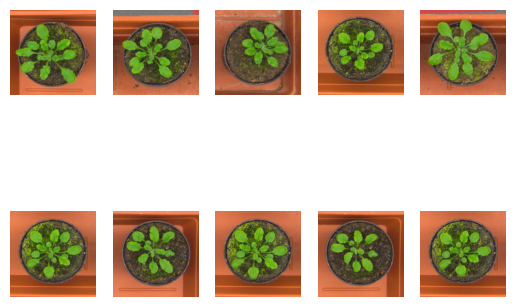

: 

In [64]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    result = img[i, :, :, :].squeeze()
    result = result.transpose(1,2,0)
    plt.imshow(result, cmap='bone')
    plt.axis('off')
    
plt.show()


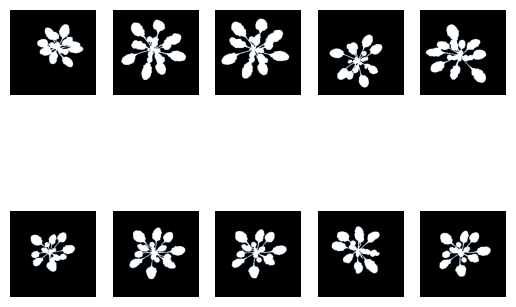

In [43]:
mask = mask.to('cpu').detach().numpy()
for i in range(10):
    plt.subplot(2, 5, i+1)
    result = mask[i, :, :].squeeze()
    # result = result.transpose(1,2,0)
    plt.imshow(result, cmap='bone')
    plt.axis('off')
    
plt.show()

# Monai Test

In [3]:
from monai.losses import DiceLoss
from monai.metrics import DiceMetric
from monai.networks.nets import SwinUNETR

: 

: 

In [ ]:
model = SwinUNETR(
        img_size=(96, 96, 96),
        in_channels=3,
        out_channels=4,
        feature_size=48
    )